In [78]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor
from PIL import Image

class SiameseDataset(Dataset):
    def __init__(self, folder1, folder2, dataframe):
        self.folder1 = folder1
        self.folder2 = folder2
        self.dataframe = dataframe
        self.transform = ToTensor()

        self.image_pairs = self.get_image_pairs()

    def get_image_pairs(self):
        image_pairs = []
        for image_name in os.listdir(self.folder1):
            if image_name.endswith(".jpeg"):
                image_name_without_ext = os.path.splitext(image_name)[0]
                image_path1 = os.path.join(self.folder1, image_name)
                image_path2 = os.path.join(self.folder2, image_name)
                is_same = self.dataframe.loc[int(image_name_without_ext), "is_same"]
                image_pairs.append((image_path1, image_path2, is_same, image_name))
        return image_pairs

    def __len__(self):
        return len(self.image_pairs)

    def __getitem__(self, index):
        image_path1, image_path2, is_same, image_name = self.image_pairs[index]
        image1 = self.transform(Image.open(image_path1))
        image2 = self.transform(Image.open(image_path2))
        return image1, image2, is_same, image_name



# Assuming you have already loaded your DataFrame into a variable called 'df'
image_folder1 = "train/image1"
image_folder2 = "train/image2"

df = pd.read_csv('train.csv')

dataset = SiameseDataset(image_folder1, image_folder2, df)


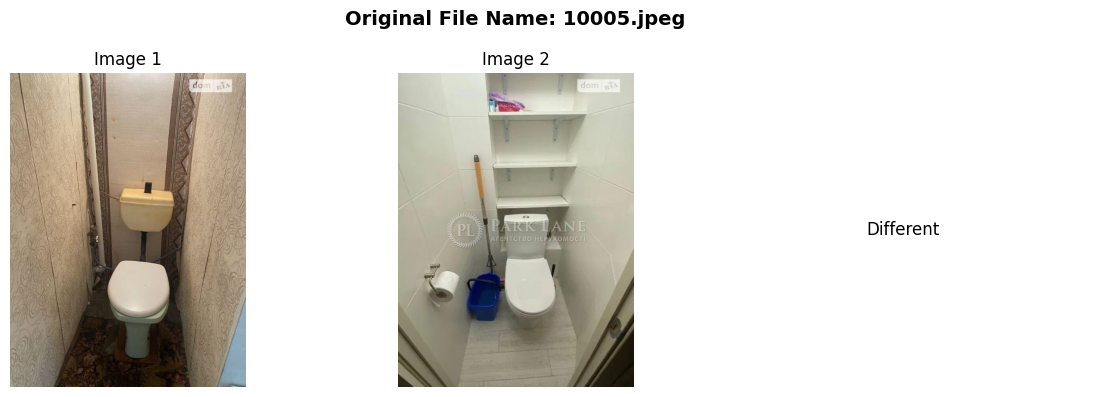

In [79]:
def visualize_dataset(dataset, row_index):
    fig = plt.figure(figsize=(12, 4))

    image1, image2, is_same, image_name = dataset[row_index]
    ax = plt.subplot(1, 3, 1)
    ax.imshow(image1.permute(1, 2, 0))
    ax.axis("off")
    ax.set_title("Image 1")

    ax = plt.subplot(1, 3, 2)
    ax.imshow(image2.permute(1, 2, 0))
    ax.axis("off")
    ax.set_title("Image 2")

    ax = plt.subplot(1, 3, 3)
    ax.text(0.5, 0.5, "Same" if is_same == 1 else "Different",
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=12)
    ax.axis("off")
    
    plt.suptitle(f"Original File Name: {image_name}", fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

visualize_dataset(dataset, 10)


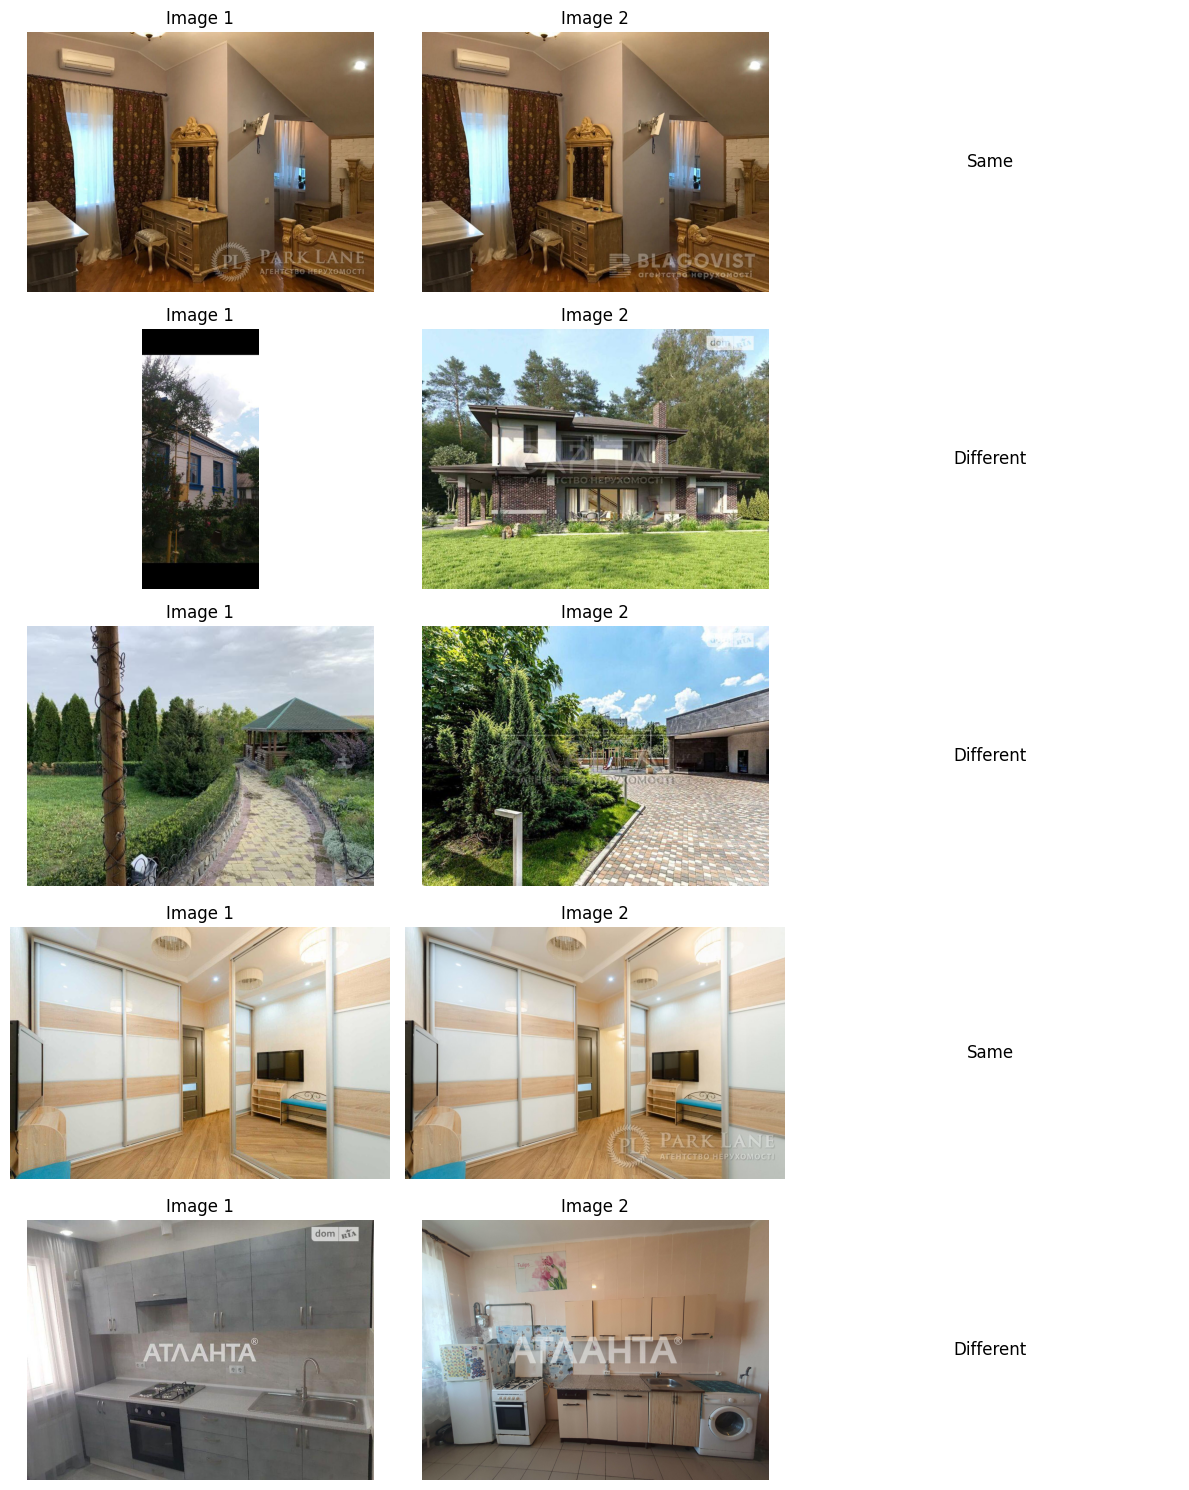

In [80]:
import random

def visualize_random_images(dataset):
    random_indices = random.sample(range(len(dataset)), 5)
    fig = plt.figure(figsize=(12, 15))

    for i, index in enumerate(random_indices):
        image1, image2, is_same, image_name = dataset[index]
        ax = plt.subplot(5, 3, (i * 3) + 1)
        ax.imshow(image1.permute(1, 2, 0))
        ax.axis("off")
        ax.set_title("Image 1")

        ax = plt.subplot(5, 3, (i * 3) + 2)
        ax.imshow(image2.permute(1, 2, 0))
        ax.axis("off")
        ax.set_title("Image 2")

        ax = plt.subplot(5, 3, (i * 3) + 3)
        ax.text(0.5, 0.5, "Same" if is_same == 1 else "Different",
                horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=12)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

visualize_random_images(dataset)


In [81]:
# Save the dataset
torch.save(dataset, 'siamese_dataset.pt')

# Load the dataset
# loaded_dataset = torch.load('siamese_dataset.pt')